In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0, 
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2]:
def plot_svm_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

In [3]:
parameters = [
    {"C": 0.1, "gamma": 0.1},
    {"C": 1, "gamma": 0.1},
    {"C": 10, "gamma": 0.1},
    {"C": 1, "gamma": 1},
    {"C": 1, "gamma": 5},
    {"C": 1, "gamma": 10}
]

In [7]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 3

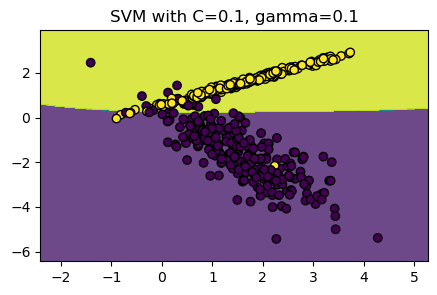

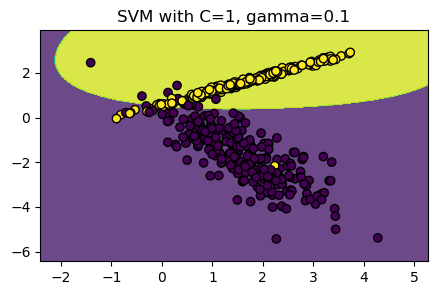

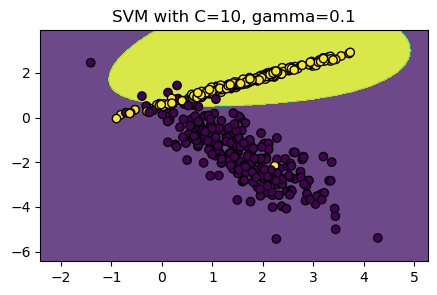

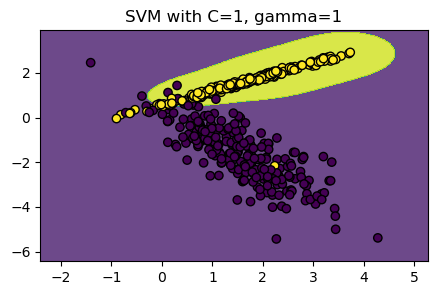

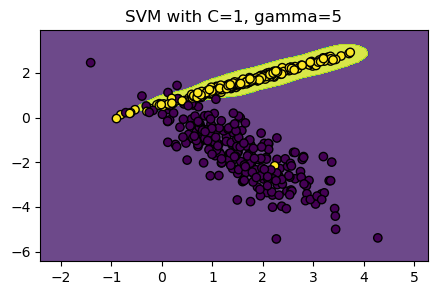

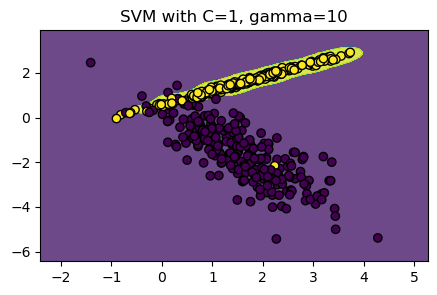

In [8]:
for param in parameters:
    model = SVC(C=param["C"], gamma=param["gamma"])
    model.fit(X_train, y_train)
    plot_svm_decision_boundary(X, y, model, f"SVM with C={param['C']}, gamma={param['gamma']}")